In [1]:
import numpy
import matplotlib.pyplot as plt 
import pandas
import mglearn
import scipy
import sklearn

w[0]: 0.393906  b: -0.031804


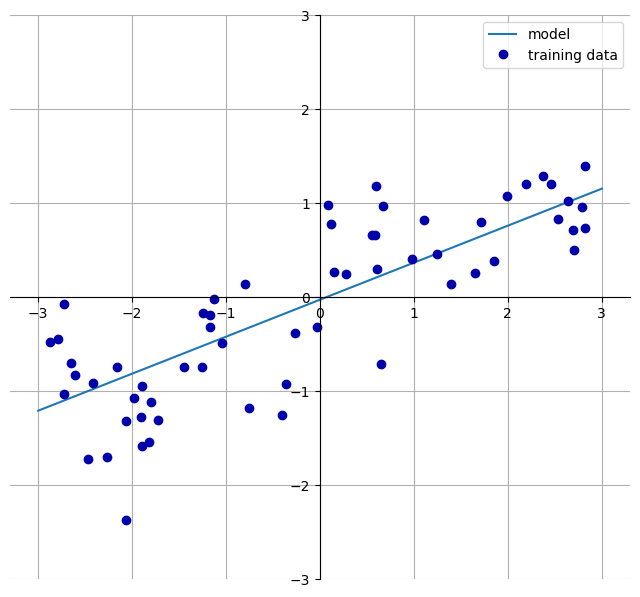

In [2]:
mglearn.plots.plot_linear_regression_wave()

## Linear regression

In [6]:
X,Y = mglearn.datasets.make_wave(n_samples=60);
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,Y, random_state=42);
lr = sklearn.linear_model.LinearRegression().fit(X_train,Y_train);

In [66]:
print("lr.coef_: {:4.4f}".format(lr.coef_[0]))
print("lr.intercept_: {:4.4f}".format(lr.intercept_))

lr.coef_: 0.3939
lr.intercept_: -0.0318


In [69]:
print("Training score : {:4.2f} %".format(lr.score(X_train,Y_train)*100));
print("Test score : {:4.2f} %".format(lr.score(X_test,Y_test)*100))

Training score : 67.01 %
Test score : 65.93 %


In [110]:
X,Y = mglearn.datasets.load_extended_boston();
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,Y, random_state=0)

In [111]:
lrBoston = sklearn.linear_model.LinearRegression().fit(X_train, Y_train);
print("Training set score: {:.2f} %".format(lrBoston.score(X_train, Y_train)*100))
print("Test set score: {:.2f} %".format(lrBoston.score(X_test, Y_test)*100))

Training set score: 95.21 %
Test set score: 60.75 %


## Ridge regression

In [55]:
ridge = sklearn.linear_model.Ridge();
ridge.fit(X_train, Y_train);
print("Training set score: {:.2f} %".format(ridge.score(X_train, Y_train)*100));
print("Test set score: {:.2f} %".format(ridge.score(X_test, Y_test)*100));

ridge10 =  sklearn.linear_model.Ridge(alpha=10).fit(X_train, Y_train);
print("Training set score: {:.2f} %".format(ridge10.score(X_train, Y_train)*100));
print("Test set score: {:.2f} %".format(ridge10.score(X_test, Y_test)*100));

ridge01 = sklearn.linear_model.Ridge(alpha=0.1).fit(X_train, Y_train);
print("Training set score: {:.2f} %".format(ridge01.score(X_train, Y_train)*100));
print("Test set score: {:.2f} %".format(ridge01.score(X_test, Y_test)*100));



Training set score: 88.58 %
Test set score: 75.28 %
Training set score: 78.83 %
Test set score: 63.59 %
Training set score: 92.82 %
Test set score: 77.22 %


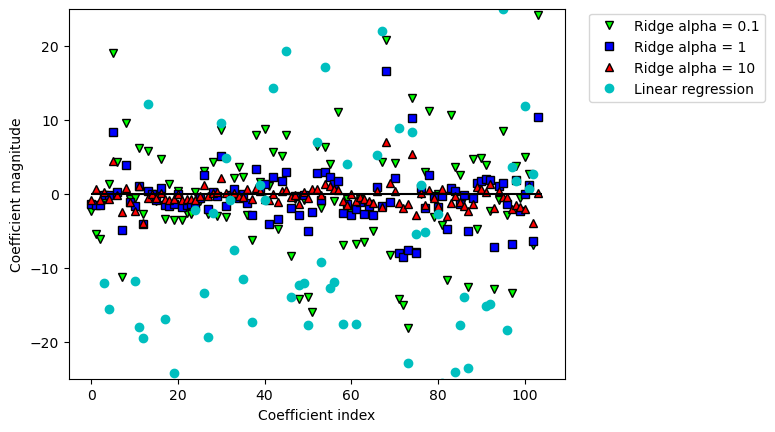

In [123]:
plt.plot(ridge01.coef_, 'v', label = "Ridge alpha = 0.1", color = "lime", mec = 'k');
plt.plot(ridge.coef_, 'sb', label = "Ridge alpha = 1", mec = 'k');
plt.plot(ridge10.coef_, '^r', label = "Ridge alpha = 10", mec = 'k');

plt.plot(lrBoston.coef_,'oc', label = "Linear regression");

plt.xlabel("Coefficient index");
plt.ylabel("Coefficient magnitude");

plt.hlines(0,0, len(lrBoston.coef_),'k');

plt.ylim([-25,25]);
plt.legend(loc = (1.05,0.75))

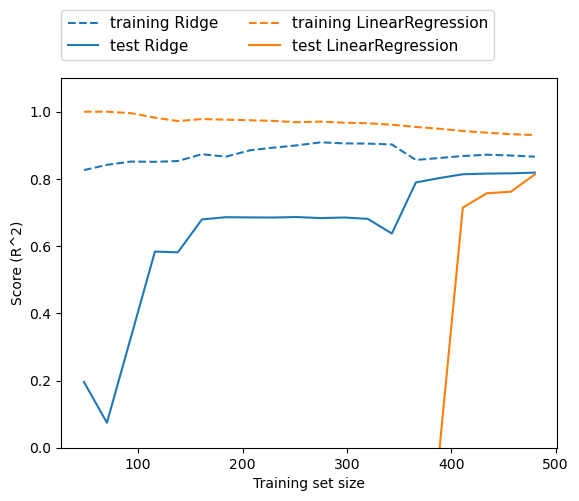

In [125]:
mglearn.plots.plot_ridge_n_samples()

## Lasso

In [20]:
X, Y = mglearn.datasets.load_extended_boston();
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, random_state=0);

lass = sklearn.linear_model.Lasso();
lass.fit(X_train, Y_train);

print("Alpha = 1")
print("Training set score: {:.2f}".format(lass.score(X_train, Y_train)))
print("Test set score: {:.2f}".format(lass.score(X_test, Y_test)))
print("Number of features used: {} of {}".format(numpy.sum(lass.coef_ != 0), X.shape[1]))

Alpha = 1
Training set score: 0.29
Test set score: 0.21
Number of features used: 4 of 104


In [22]:
for i in range(10,101,10):

    lass.set_params(alpha = 1/i, max_iter = int(1e5));
    lass.fit(X_train, Y_train)
    
    print("Alpha = {:4.4f}".format(1/i));
    print("Training set score: {:.2f}".format(lass.score(X_train, Y_train)));
    print("Test set score: {:.2f}".format(lass.score(X_test, Y_test)));
    print("Number of features used: {} of {}\n\n".format(numpy.sum(lass.coef_ != 0), X.shape[1]));

Alpha = 0.1000
Training set score: 0.77
Test set score: 0.63
Number of features used: 8 of 104


Alpha = 0.0500
Training set score: 0.83
Test set score: 0.69
Number of features used: 18 of 104


Alpha = 0.0333
Training set score: 0.85
Test set score: 0.72
Number of features used: 20 of 104


Alpha = 0.0250
Training set score: 0.86
Test set score: 0.73
Number of features used: 24 of 104


Alpha = 0.0200
Training set score: 0.87
Test set score: 0.74
Number of features used: 26 of 104


Alpha = 0.0167
Training set score: 0.88
Test set score: 0.75
Number of features used: 28 of 104


Alpha = 0.0143
Training set score: 0.89
Test set score: 0.75
Number of features used: 27 of 104


Alpha = 0.0125
Training set score: 0.89
Test set score: 0.76
Number of features used: 29 of 104


Alpha = 0.0111
Training set score: 0.89
Test set score: 0.76
Number of features used: 32 of 104


Alpha = 0.0100
Training set score: 0.90
Test set score: 0.77
Number of features used: 33 of 104




In [30]:
lass.set_params(alpha = 0.001, max_iter = int(1e5));
lass.fit(X_train, Y_train)
    
print("Alpha = 0.001, over fitting");
print("Training set score: {:.2f}".format(lass.score(X_train, Y_train)));
print("Test set score: {:.2f}".format(lass.score(X_test, Y_test)));
print("Number of features used: {} of {}\n\n".format(numpy.sum(lass.coef_ != 0), X.shape[1]));

Alpha = 0.001, over fitting
Training set score: 0.94
Test set score: 0.74
Number of features used: 67 of 104




In [45]:
symbolPlots[::-1]

['oc', '^r', 'vm', 'sb']

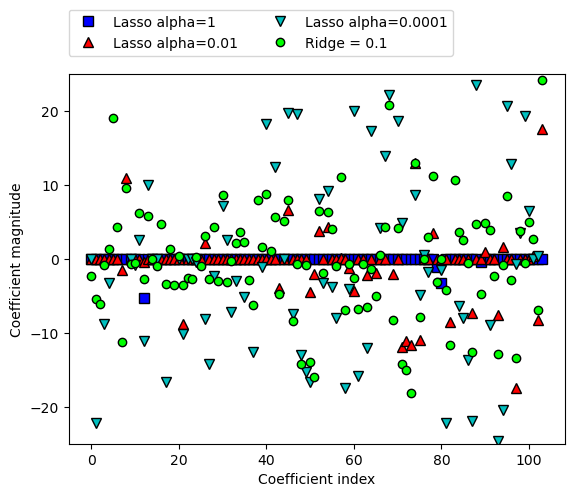

In [65]:
F = plt.figure();

symbolPlots = ['sb','^r','vc','oc'];

for i,a in enumerate([1, 0.01, 0.0001]):
    lass.set_params(alpha = a, max_iter = int(1e6));
    lass.fit(X_train, Y_train);

    plt.plot(lass.coef_, symbolPlots[i], label = "Lasso alpha={}".format(a), markersize = 7, mec = 'k');


plt.plot(ridge01.coef_, 'o', color = "Lime", markersize = 6, mec = 'k', label = "Ridge = 0.1")
plt.ylim([-25,25]);
plt.legend(loc = (0,1.05), ncol = 2);
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.show();

In [73]:
lass.set_params(alpha = 0.5, max_iter = int(1e6));
lass.fit(X_train, Y_train);

lass.coef_[lass.coef_ != 0]

array([ -1.29844407, -12.48903721,   4.56250393,   5.32418629,
        -2.11013555,  -3.33948706])

## Linear model for classifaction

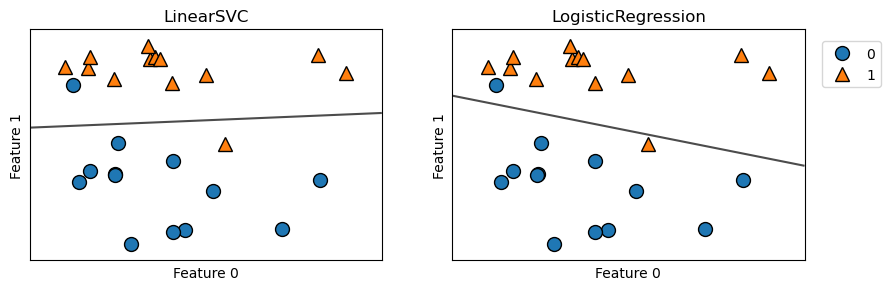

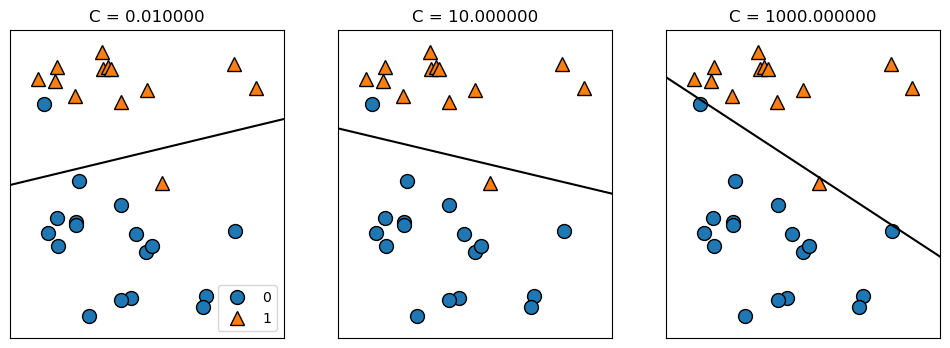

In [94]:
X,y = mglearn.datasets.make_forge();

fig, axes = plt.subplots(1,2, figsize = (10,3));

linSVC = sklearn.svm.LinearSVC;
logReg = sklearn.linear_model.LogisticRegression;

for model, ax in zip([linSVC(max_iter=100000), logReg(max_iter=100000)],axes):
    clf = model.fit(X,y);
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps = 0.5, ax=ax, alpha=.7);
    mglearn.discrete_scatter(X[:,0],X[:,1], y, ax = ax);
    ax.set_title("{}".format(clf.__class__.__name__));
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[1].legend( loc = (1.05,0.75));
mglearn.plots.plot_linear_svc_regularization();

In [2]:
cancer = sklearn.datasets.load_breast_cancer();
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(cancer.data, 
                                                                            cancer.target, 
                                                                            stratify=cancer.target, 
                                                                            random_state=42);

logreg = sklearn.linear_model.LogisticRegression(max_iter = 1000000).fit(X_train, y_train);

for c in [0.001, 0.01, 1, 10, 50, 100]:
    logreg = sklearn.linear_model.LogisticRegression(C = c,max_iter = 1000000).fit(X_train, y_train);
    print(f"C = {c}");
    print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)));
    print("Test set score: {:.3f}\n".format(logreg.score(X_test, y_test)));

C = 0.001
Training set score: 0.953
Test set score: 0.944

C = 0.01
Training set score: 0.953
Test set score: 0.951

C = 1
Training set score: 0.953
Test set score: 0.958

C = 10
Training set score: 0.974
Test set score: 0.965

C = 50
Training set score: 0.981
Test set score: 0.965

C = 100
Training set score: 0.984
Test set score: 0.965



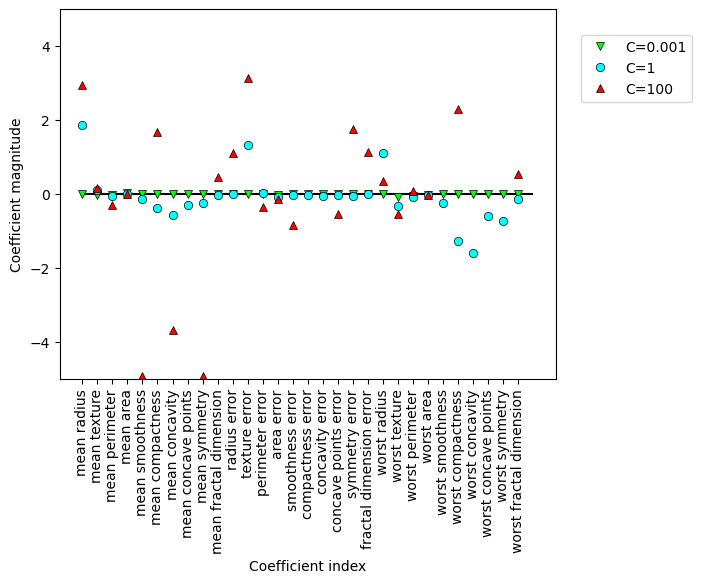

In [27]:
Fig = plt.figure();

marker = ['v','o','^'];
markerColour = ["lime","cyan","red"];

plt.hlines(0, 0, cancer.data.shape[1],'k');
for (c,m,mc) in zip([0.001, 1, 100],marker, markerColour):
    # print(f"{c}-{m}-{mc}");
    logreg = sklearn.linear_model.LogisticRegression(C = c,max_iter = 1000000).fit(X_train, y_train);
    plt.plot(logreg.coef_[0],m, mfc=mc, mec='k', mew=0.5, label = f"C={c}");

plt.xticks(range(0,cancer.data.shape[1]), cancer.feature_names, rotation=90);
plt.ylim(-5, 5);
plt.xlabel("Coefficient index");
plt.ylabel("Coefficient magnitude");
plt.legend(loc = (1.05,0.75));

Training accuracy of l1 logreg with C=0.001: 0.95
Test accuracy of l1 logreg with C=0.001: 0.94
Training accuracy of l1 logreg with C=1.000: 0.95
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.98
Test accuracy of l1 logreg with C=100.000: 0.97


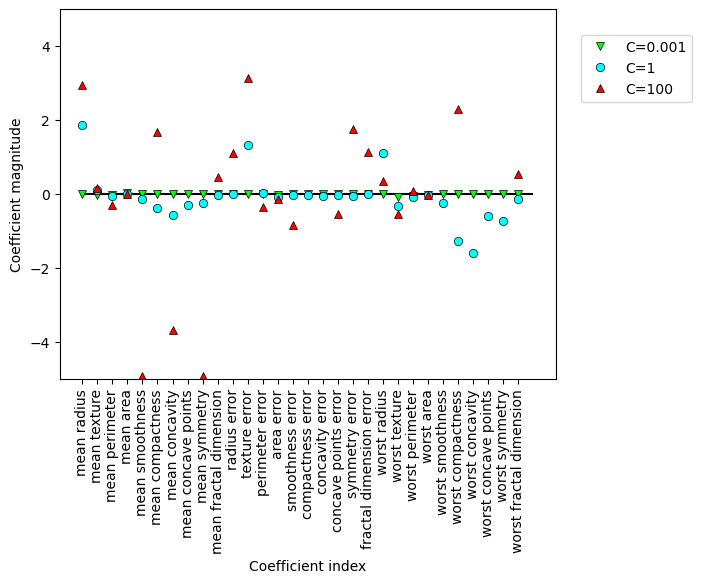

In [30]:
Fig = plt.figure();

marker = ['v','o','^'];
markerColour = ["lime","cyan","red"];

plt.hlines(0, 0, cancer.data.shape[1],'k');
for (c,m,mc) in zip([0.001, 1, 100],marker, markerColour):
    logreg = sklearn.linear_model.LogisticRegression(C = c,max_iter = 1000000, penalty="l2").fit(X_train, y_train);
    plt.plot(logreg.coef_[0],m, mfc=mc, mec='k', mew=0.5, label = f"C={c}");
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
    c, logreg.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
    c, logreg.score(X_test, y_test)))

plt.xticks(range(0,cancer.data.shape[1]), cancer.feature_names, rotation=90);
plt.ylim(-5, 5);
plt.xlabel("Coefficient index");
plt.ylabel("Coefficient magnitude");
plt.legend(loc = (1.05,0.75));

## Multiclass specifications

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


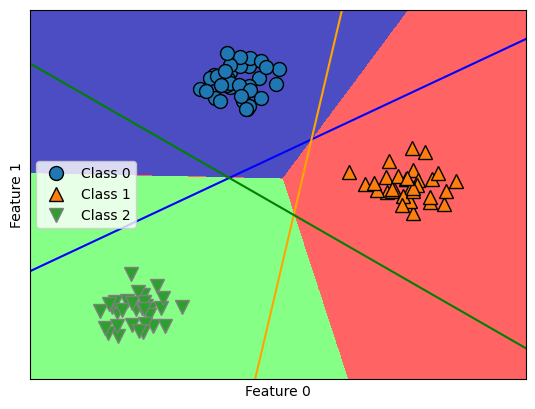

In [17]:
X,y = sklearn.datasets.make_blobs(random_state = 42);
mglearn.discrete_scatter(X[:,0], X[:,1], y);
plt.xlabel("Feature 0");
plt.ylabel("Feature 1");
plt.legend(["Class 0", "Class 1", "Class 2"]);

lin_svm = sklearn.svm.LinearSVC().fit(X,y);

mglearn.plots.plot_2d_classification(lin_svm, X, fill=True, alpha=.7);

print("Coefficient shape: ", lin_svm.coef_.shape);
print("Intercept shape: ", lin_svm.intercept_.shape);

line = numpy.linspace(-15,15);
for (coeff, intercept, color) in zip(lin_svm.coef_, lin_svm.intercept_, ['b','orange','g']):
    plt.plot(line, -(line * coeff[0] + intercept)/coeff[1], c = color);
    # print(coeff)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)
